___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [119]:
# UMTMVS.csv 데이터 사용

# CODE HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read in the data UMTMVS.csv file from the Data folder**

In [120]:
# CODE HERE
df = pd.read_csv('UMTMVS.csv')
df

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0
...,...,...
320,2018-09-01,516992.0
321,2018-10-01,527031.0
322,2018-11-01,495901.0
323,2018-12-01,490076.0


**Check the head of the data**

In [121]:
# CODE HERE
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [122]:
# CODE HERE

In [123]:
df.set_index('DATE', inplace=True)
df

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0
...,...
2018-09-01,516992.0
2018-10-01,527031.0
2018-11-01,495901.0


**Check the data type of the index.**

In [124]:
# CODE HERE
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [125]:
# CODE HERE

In [126]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

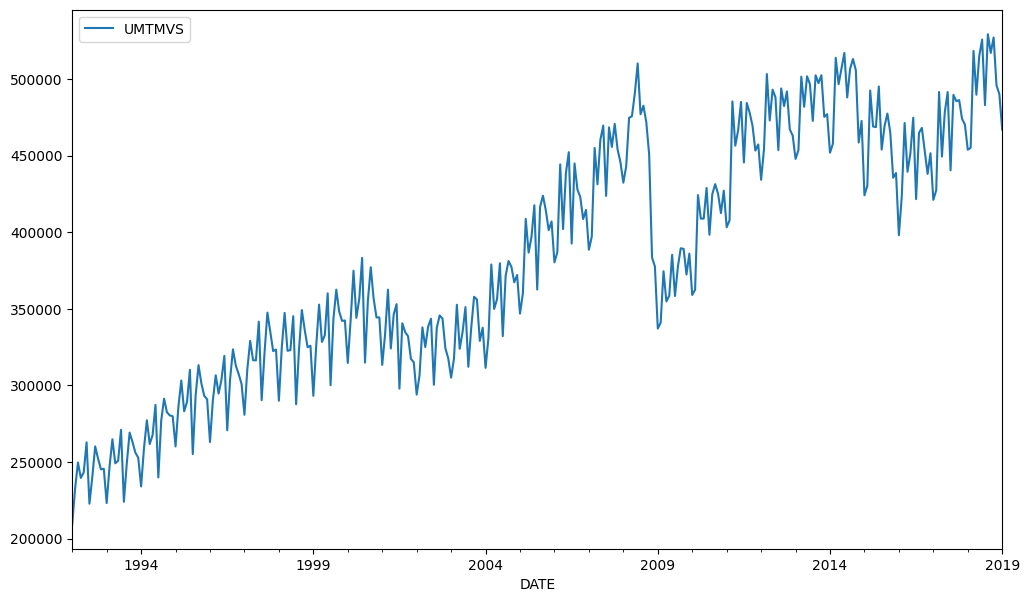

In [127]:
# CODE HERE
df.plot(figsize=(12,7));

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [128]:
#CODE HERE
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01'])/df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [129]:
#CODE HERE
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01'])/df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [130]:
#CODE HERE

# 방법 1
# df.loc['2005-01-01':].sort_values(by='UMTMVS').head(1)

# 방법 2
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [131]:
# CODE HERE
df.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [132]:
# CODE HERE
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

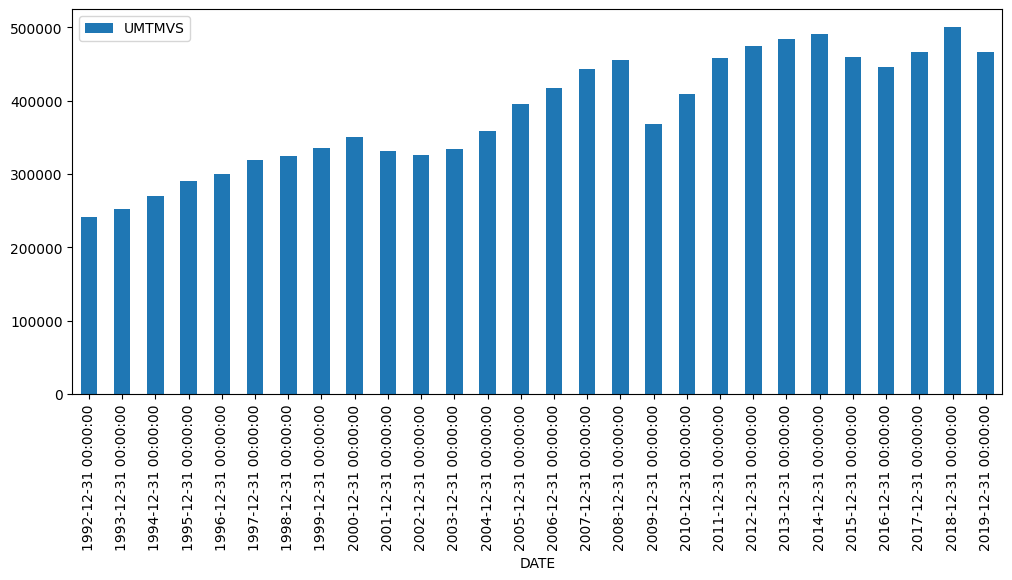

In [133]:
# CODE HERE
df.resample('Y').mean().plot.bar(figsize=(12,5));

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [137]:
# # CODE HERE
df_year = df.resample('Y').mean()

In [141]:
df_year['increase'] = df_year.UMTMVS - df_year.UMTMVS.shift(1)
df_year.head()

,UMTMVS,increase
DATE,,
1992-12-31,242002.000000,NaN
1993-12-31,251708.083333,9706.083333
1994-12-31,269842.666667,18134.583333
1995-12-31,289973.083333,20130.416667
1996-12-31,299765.666667,9792.583333


In [150]:
# 방법 1
# df_year.sort_values(by='increase', ascending=False).head(1)

# 방법2
df_year.increase.idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

In [152]:
# CODE HERE
df['year_moving_average'] = df.rolling(window=12).mean()
df

,UMTMVS,year_moving_average
DATE,,
1992-01-01,209438.0,NaN
1992-02-01,232679.0,NaN
1992-03-01,249673.0,NaN
1992-04-01,239666.0,NaN
1992-05-01,243231.0,NaN
...,...,...
2018-09-01,516992.0,493075.583333
2018-10-01,527031.0,496482.333333
2018-11-01,495901.0,498308.833333


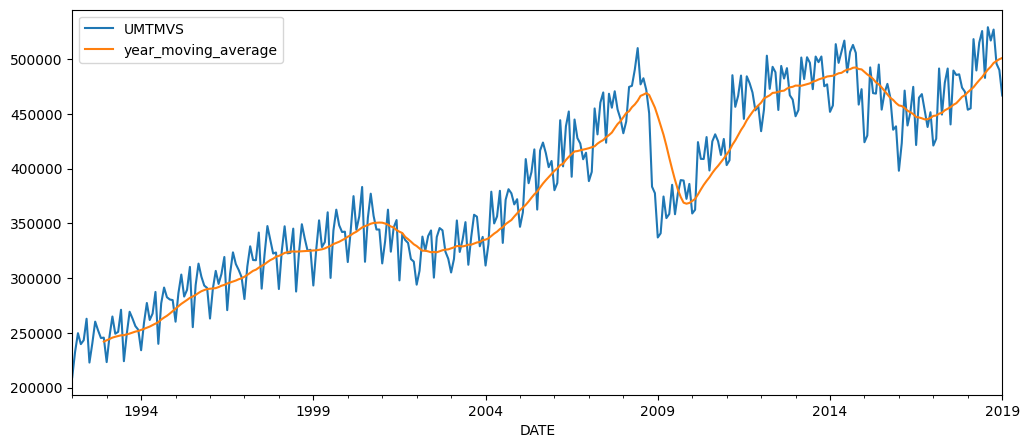

In [155]:
df[['UMTMVS', 'year_moving_average']].plot(figsize=(12,5));